In [1]:
%load_ext autoreload
%autoreload 2

- [Element Picker](#Element-Picker)
- [Gaussian Smoothing Picker](#Gaussian-Smoothing-Picker)
- [Von Mises](#Von-Mises-Stress-Condition)
- [Von Mises Result](#Von-Mises-Result)
- [Circle](#Circle-Stress-Condition)
- [Circle Result](#Circle-Result)

In [1]:
import struct_opt.material_opt as material_opt
import struct_opt.visual as visual
from struct_opt.environment_setup import get_element_index_matrix

import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt


Element Picker
---

elements are indexed in the following manner

| 1 | 5 | 9  | 13 |
|---|---|----|----|
| 2 | 6 | 10 | 14 |
| 3 | 7 | 11 | 15 |
| 4 | 8 | 12 | 16 |

visualize elements using function below

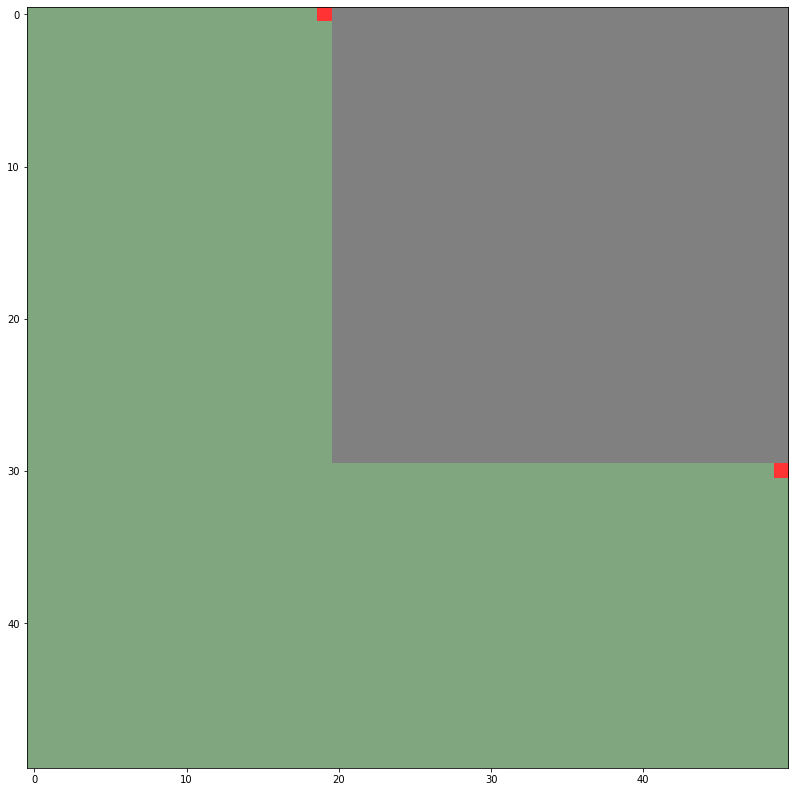

In [2]:
problem_size = 10

elements = [16 * np.square(problem_size) - problem_size * 2, 950]
element_index_matrix = get_element_index_matrix(problem_size)


visual.highlight_elements(element_index_matrix, elements)

Gaussian Smoothing Picker
---

Use this to check how the mass is spread out for different value of the variance and width of some element

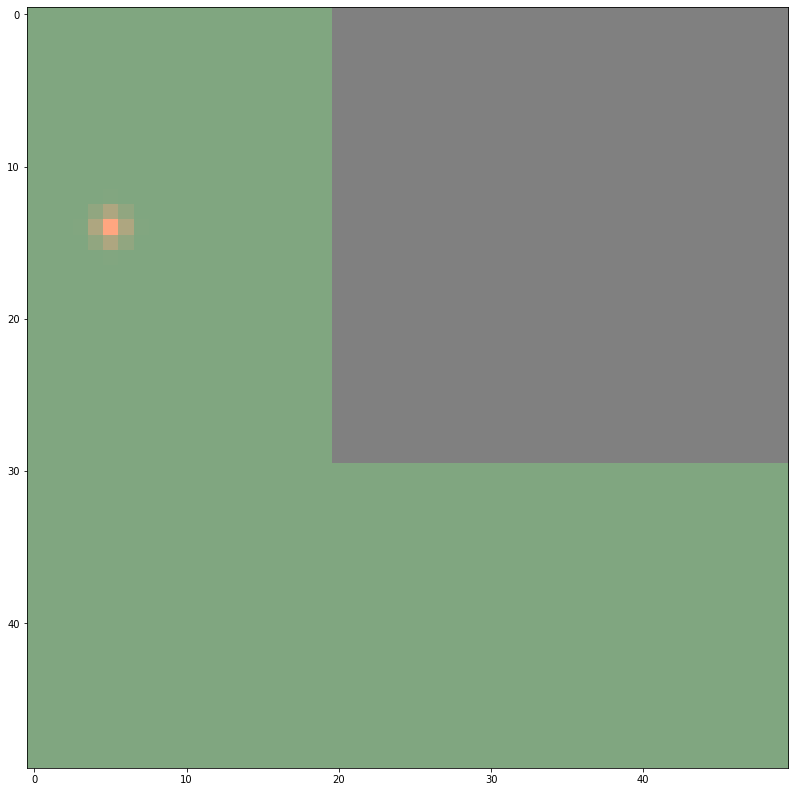

In [3]:
visual.highlight_gaussian_smoothing(element_index_matrix, element=264, variance=1.0, width=3.0)

Von Mises Stress Condition
---

In [7]:
problem_size = 10
material_opt.main(
    problem_size=problem_size,
    elements=np.array([
        16 * np.square(problem_size) - problem_size * 2
    ]),
    directions=np.array([
        1
    ]),
    amplitudes=np.array([
        -1
    ]),
    max_constraint=5000,
    
    mode="von mises",
    
    smoothing_mode="gaussian",
    smoothing_width=3.0,
    variance=1.0,
    
    thickness=0.02,
    poisson_ratio=0.3,
    initial_value_design=2.0,
    elasticity_module=1000,
    
    barrier_size=1000,
    barrier_width=3000,
    
    epochs=150,
    learning_rate=0.1,
    
    data_directory="data"
)


Initializing env: 0.03283286094665527 seconds
0: O: 819.7209712872635 W: 1409.275324764612 C 3196.8153466561844 -- T: 0.9849121570587158
1: O: 782.4222203792683 W: 1398.675174907749 C 3148.024412339181 -- T: 0.8317391872406006
2: O: 746.4193310058898 W: 1386.5212351706843 C 3103.325851547696 -- T: 0.8311409950256348
3: O: 711.2720618442168 W: 1372.8146367458608 C 3062.2208003636338 -- T: 0.835883617401123
4: O: 676.589087188435 W: 1357.5443573340995 C 3024.2357803916825 -- T: 0.8486061096191406
5: O: 642.0214095770907 W: 1340.6874152293522 C 2988.9318362778345 -- T: 0.829423189163208
6: O: 607.2591997709899 W: 1322.2214840675963 C 2955.890414226149 -- T: 0.8331422805786133
7: O: 572.0292455257783 W: 1302.1286576716923 C 2924.7141408915204 -- T: 0.814626932144165
8: O: 560.3411242801953 W: 1280.3980197622552 C 2945.449898062971 -- T: 0.8046731948852539
9: O: 530.0382139057709 W: 1258.7536090783146 C 2927.5833394658393 -- T: 0.8090033531188965
10: O: 493.80587453171813 W: 1236.3662007723

89: O: -208.17217549478596 W: 632.721847983112 C 2681.56121077175 -- T: 0.8514394760131836
90: O: -210.2589196995673 W: 633.0437329778837 C 2675.9702207987943 -- T: 0.8425016403198242
91: O: -212.9386909784772 W: 633.1942454232343 C 2669.383240202617 -- T: 0.8288402557373047
92: O: -216.04778295018218 W: 633.1741780010983 C 2662.3197175219757 -- T: 0.8185439109802246
93: O: -219.0452030744965 W: 633.1379847037178 C 2655.2396810870882 -- T: 0.8396451473236084
94: O: -218.23147796435467 W: 632.9600514453309 C 2657.5642697289245 -- T: 0.8288407325744629
95: O: -224.7828503813796 W: 632.7310827324935 C 2642.9135224987863 -- T: 0.8196306228637695
96: O: -219.11312141819485 W: 632.3894334010656 C 2656.844645187031 -- T: 0.8417942523956299
97: O: -223.1354412842869 W: 631.9989182436403 C 2648.3961808071313 -- T: 0.8401205539703369
98: O: -183.44561137583855 W: 631.3303368959977 C 2741.3304431637694 -- T: 0.8432753086090088
99: O: -224.6759815502361 W: 629.9611784868181 C 2649.478638617183 -- 

Von Mises Result
---

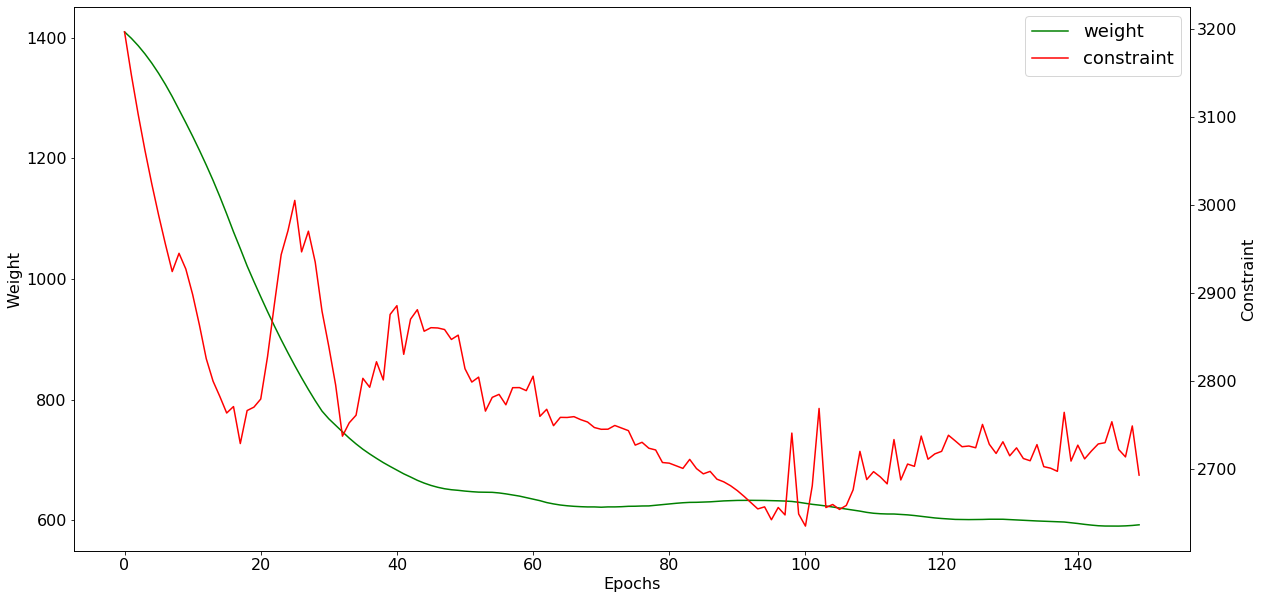

In [8]:
V = visual.Visual(data_path="data", plot=False)

V.constraint_weigth_plot()

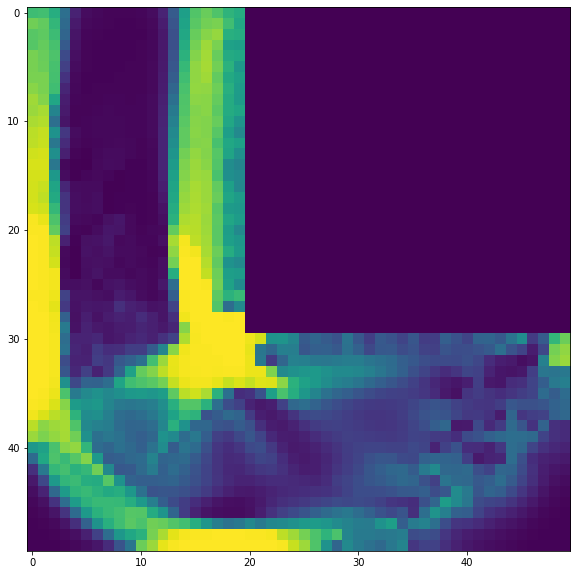

In [9]:
design_animation = V.animate(problem_size, mode="design")
HTML(design_animation.to_html5_video())

Circle Stress Condition
---

In [17]:
problem_size = 10
material_opt.main(
    problem_size=problem_size,
    elements=np.array([
        16 * np.square(problem_size) - problem_size * 2, 225
    ]),
    directions=np.array([
        1,
        1
    ]),
    amplitudes=np.array([
        -1,
        -1
    ]),
    max_constraint=18000,
    
    mode="circle",
    smoothing_mode="gaussian",
    smoothing_width=3.0,
    variance=1.0,
    
    thickness=0.02,
    poisson_ratio=0.3,
    initial_value_design=2.0,
    elasticity_module=1000,
    
    barrier_size=100,
    barrier_width=2000,
    
    epochs=150,
    learning_rate=0.1,
    
    phis=[0.0, 0.5],
    kf=0.3,
    
    data_directory="data"
)


Initializing env: 0.05580019950866699 seconds
0: O: 1125.3024583359079 W: 1409.275324764612 C 16288.88779512984 -- T: 1.1364994049072266
1: O: 1111.506458184029 W: 1397.9195245323945 C 16246.619619879946 -- T: 0.8276684284210205
2: O: 1097.3908975694521 W: 1384.808172858047 C 16228.923312107148 -- T: 0.8488965034484863
3: O: 1082.85414769784 W: 1370.1258066622977 C 16231.500412083209 -- T: 0.8298990726470947
4: O: 1067.8489742730223 W: 1353.9488488216316 C 16252.10247304403 -- T: 0.8338227272033691
5: O: 1052.3694104759331 W: 1336.318602705555 C 16289.292839292368 -- T: 0.854517936706543
6: O: 1036.4445962076916 W: 1317.3468932426954 C 16340.630223857228 -- T: 0.8307645320892334
7: O: 1020.1227420292563 W: 1297.275383505293 C 16401.698789488917 -- T: 0.8347511291503906
8: O: 1003.4571358301575 W: 1276.3072336545592 C 16469.008009291607 -- T: 0.833812952041626
9: O: 986.5327518723407 W: 1254.4616474618917 C 16542.527366260154 -- T: 0.8547415733337402
10: O: 969.470717887989 W: 1231.8005

90: O: 533.8176740939583 W: 786.4992481363028 C 16748.640390977067 -- T: 0.8799712657928467
91: O: 532.770434479165 W: 786.315118818354 C 16737.793032348367 -- T: 0.8640968799591064
92: O: 532.3053648993873 W: 786.2054472720632 C 16733.299566088026 -- T: 0.8610336780548096
93: O: 531.4256369528772 W: 786.2312740036216 C 16721.827731071528 -- T: 0.840867280960083
94: O: 531.4471682557436 W: 786.4448908703753 C 16719.56036414539 -- T: 0.8402724266052246
95: O: 532.1206873348151 W: 786.6209895552398 C 16725.834059200573 -- T: 0.8648717403411865
96: O: 532.408690210678 W: 786.7817871413667 C 16727.445712380875 -- T: 0.866602897644043
97: O: 532.346218003867 W: 786.9289841390437 C 16724.828317081643 -- T: 0.8499293327331543
98: O: 531.9719726977048 W: 787.0469748547415 C 16718.60693240045 -- T: 0.8652913570404053
99: O: 531.3593067730151 W: 787.1073831708503 C 16709.775103345615 -- T: 0.845452070236206
100: O: 532.4089531291434 W: 787.0754773302791 C 16723.55338689324 -- T: 0.84016108512878

Circle Result
---

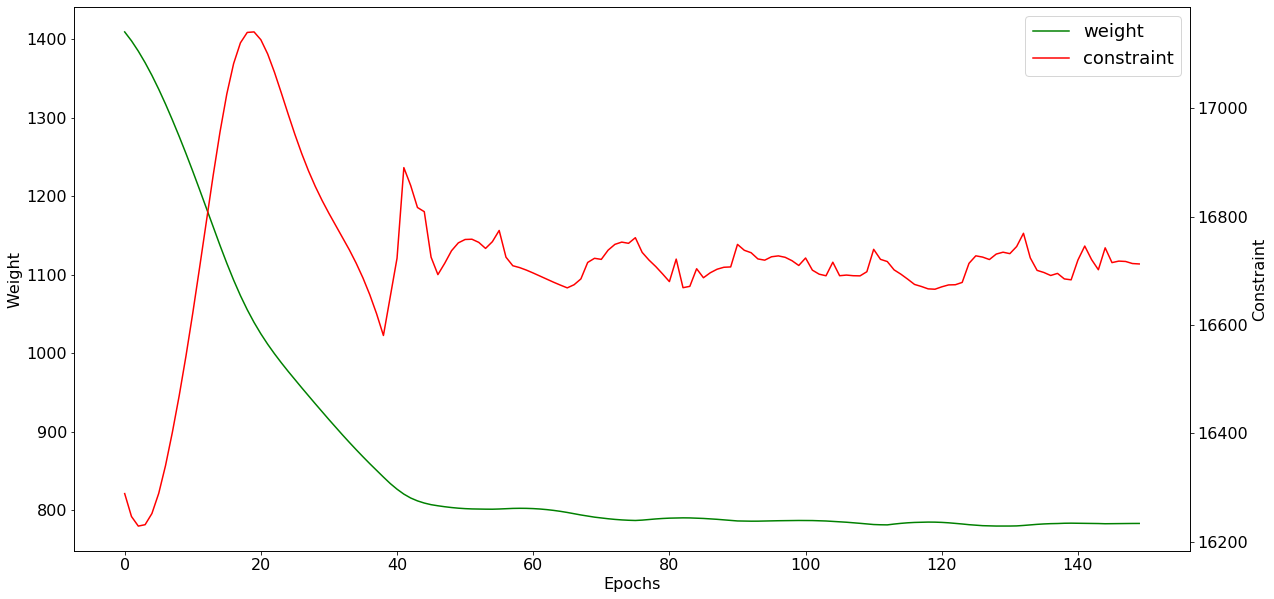

In [18]:
V = visual.Visual(data_path="data", plot=False)

V.constraint_weigth_plot()

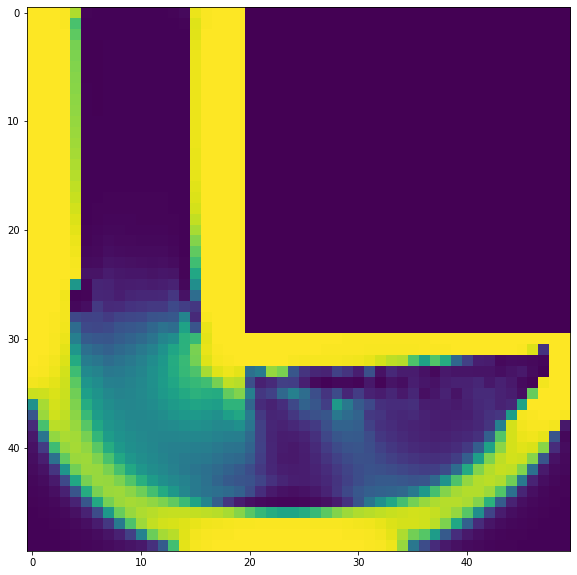

In [19]:
design_animation = V.animate(problem_size, mode="design")
HTML(design_animation.to_html5_video())